In [1]:
# qiskit
!pip install qiskit
!pip install numpy scipy matplotlib ipython pandas sympy nose seaborn
!pip install scikit-learn
!pip install pylatexenc ipywidgets qutip

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 6.5 MB 11.3 MB/s            
     |████████████████████████████████| 17.9 MB 22.1 MB/s            
     |████████████████████████████████| 238 kB 22.5 MB/s            
     |████████████████████████████████| 200 kB 25.2 MB/s            
     |████████████████████████████████| 16.8 MB 25.9 MB/s            
  Using cached scipy-1.7.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (39.3 MB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
     |████████████████████████████████| 53 kB 3.5 MB/s             
     |████████████████████████████████| 138 kB 23.4 MB/s            
     |████████████████████████████████| 1.4 MB 18.8 MB/s            
     |████████████████████████████████| 86 kB 7.5 MB/s             
     |████████████████████████████████| 49 kB 8.3 MB/s             
     |████████████████████████████████| 38.3 MB 14.2 MB/s            
     |████████████████████████████████| 49 kB 

  Using cached pytz-2021.3-py2.py3-none-any.whl (503 kB)
  Using cached scikit_learn-1.0.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.0.0-py3-none-any.whl (14 kB)
     |████████████████████████████████| 162 kB 9.1 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 16.0 MB 13.9 MB/s            


Using legacy 'setup.py install' for pylatexenc, since package 'wheel' is not installed.
    Running setup.py install for pylatexenc ... done


In [16]:
# blueqat
!pip install blueqat

     |████████████████████████████████| 67 kB 2.8 MB/s             


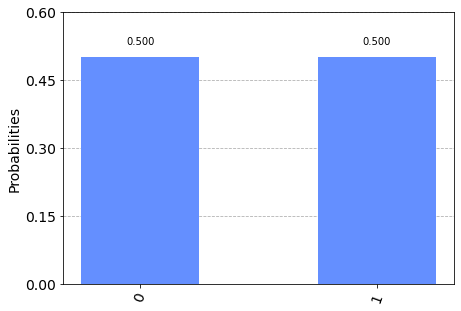

In [3]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from math import sqrt

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Define state |Psi>
initial_state = [1/sqrt(2), 1/sqrt(2)]

# Apply initialization operation to the qubit at position 0
qc.initialize(initial_state, 0)

# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator')

# Do the simulation, returning the result
result = execute(qc,backend).result()

# Get the data and display histogram
counts = result.get_counts()
plot_histogram(counts)

In [4]:
qc.draw(output='text')

┌─────────────────────────────┐
q: ┤ Initialize(0.70711,0.70711) ├
   └─────────────────────────────┘

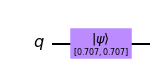

In [6]:
qc.draw('mpl')

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


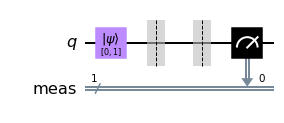

In [14]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.save_statevector()   # Tell simulator to save statevector
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result

out_state = result.get_statevector()
print(out_state) # Display the output state vector

qc.measure_all()
qc.draw('mpl')

In [29]:
from blueqat import Circuit
import blueqat.macros

a = Circuit().h[0].cx[0, 1].m[1]
a.draw()

┌───┐        
q_0: ┤ H ├──■─────
     └───┘┌─┴─┐┌─┐
q_1: ─────┤ X ├┤M├
          └───┘└╥┘
c: 2/═══════════╩═
                1

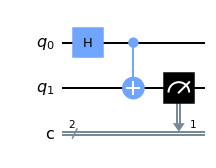

In [27]:
a.draw(output='mpl')

## Section 3.5: Parameterized Quantum Circuit

https://github.com/quantum-machine-learning/Hands-On-Quantum-Machine-Learning-With-Python-Vol-1  

In [36]:
!mkdir -p data
!wget https://github.com/quantum-machine-learning/Hands-On-Quantum-Machine-Learning-With-Python-Vol-1/raw/master/data/train.csv -O data/train.csv
!wget https://github.com/quantum-machine-learning/Hands-On-Quantum-Machine-Learning-With-Python-Vol-1/raw/master/data/train.npy -O data/train.npy
!wget https://github.com/quantum-machine-learning/Hands-On-Quantum-Machine-Learning-With-Python-Vol-1/raw/master/data/test.csv -O data/test.csv
!wget https://github.com/quantum-machine-learning/Hands-On-Quantum-Machine-Learning-With-Python-Vol-1/raw/master/data/test.npy -O data/test.npy

--2022-01-17 16:08:50--  https://github.com/quantum-machine-learning/Hands-On-Quantum-Machine-Learning-With-Python-Vol-1/raw/master/data/train.csv
Resolving github.com (github.com)... 15.164.81.167
접속 github.com (github.com)|15.164.81.167|:443... 접속됨.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/quantum-machine-learning/Hands-On-Quantum-Machine-Learning-With-Python-Vol-1/master/data/train.csv [following]
--2022-01-17 16:08:50--  https://raw.githubusercontent.com/quantum-machine-learning/Hands-On-Quantum-Machine-Learning-With-Python-Vol-1/master/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
접속 raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... 접속됨.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘data/train.csv’

data/train.csv      100%[===================>]  58.89K  --.-KB/s    

In [40]:
# Listing 3.15: The parameterized quantum circuit classifier
from qiskit import execute, Aer, QuantumCircuit
from math import sqrt
from sklearn.metrics import recall_score, precision_score, confusion_matrix

def pqc_classify(backend, passenger_state):
    """backend -- a qiskit backend to run the quantum circuit at
    passenger_state -- a valid quantum state vector"""
    
    # Create a quantum circuit with one qubit
    qc = QuantumCircuit(1) 

    # Define state |Psi> and initialize the circuit
    qc.initialize(passenger_state, 0)
    
    # Measure the qubit
    qc.measure_all()

    # run the quantum circuit
    result=execute(qc,backend).result()

    # get the counts, these are either {'0': 1} or {'1': 1}
    counts=result.get_counts(qc)
    
    # get the bit 0 or 1
    return int(list(map(lambda item: item[0], counts.items()))[0])

In [39]:
import numpy as np
with open('data/train.npy', 'rb') as f:
  train_input = np.load(f)
  train_labels = np.load(f)
with open('data/test.npy', 'rb') as f:
  test_input = np.load(f)
  test_labels = np.load(f)

In [41]:
# REDEFINE OR IMPORT THE FUNCTIONS OF CHAPTER 2
def run(f_classify, x):
    return list(map(f_classify, x))

def specificity(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[0][1]) if (matrix[0][0]+matrix[0][1] > 0) else 0

def npv(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[1][0]) if (matrix[0][0]+matrix[1][0] > 0) else 0

def classifier_report(name, run, classify, input, labels):
    cr_predictions = run(classify, input)
    cr_cm = confusion_matrix(labels, cr_predictions)

    cr_precision = precision_score(labels, cr_predictions)
    cr_recall = recall_score(labels, cr_predictions)
    cr_specificity = specificity(cr_cm)
    cr_npv = npv(cr_cm)
    cr_level = 0.25*(cr_precision + cr_recall + cr_specificity + cr_npv)

    print('The precision score of the {} classifier is {:.2f}'
        .format(name, cr_precision))
    print('The recall score of the {} classifier is {:.2f}'
        .format(name, cr_recall))
    print('The specificity score of the {} classifier is {:.2f}'
        .format(name, cr_specificity))
    print('The npv score of the {} classifier is {:.2f}'
        .format(name, cr_npv))
    print('The information level is: {:.2f}'
        .format(cr_level))
#CAPTION A reusable function to unmask the hypocrite classifier

In [43]:
# Listing 3.17: The scores of the random quantum classifier
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 

# Specify the quantum state that results in either 0 or 1
initial_state = [1/sqrt(2), 1/sqrt(2)] 

classifier_report("Random PQC", 
    run,
    lambda passenger: pqc_classify(backend, initial_state),
    train_input,
    train_labels)

The precision score of the Random PQC classifier is 0.37
The recall score of the Random PQC classifier is 0.49
The specificity score of the Random PQC classifier is 0.50
The npv score of the Random PQC classifier is 0.62
The information level is: 0.50


## Section 3.6 Variational Hybrid Quantum-Classical Algorithm

In [48]:
from qiskit import execute, Aer, QuantumCircuit
from math import sqrt
from sklearn.metrics import recall_score, precision_score, confusion_matrix

In [49]:
# Listing 3.20: Pre‐processing template
def pre_process(passenger):
    """
    passenger -- the normalized (array of numeric data) passenger data
    returns a valid quantum state
    """
    quantum_state = [1/sqrt(2), 1/sqrt(2)] 
    return quantum_state

In [50]:
# Listing 3.21: The parameterized quantum circuit
def pqc(backend, quantum_state):
    """
    backend -- a qiskit backend to run the quantum circuit at
    quantum_state -- a valid quantum state vector  
    returns the counts of the measurement
    """

    # Create a quantum circuit with one qubit
    qc = QuantumCircuit(1) 

    # Define state |Psi> and initialize the circuit
    qc.initialize(quantum_state, 0)
    
    # Measure the qubit
    qc.measure_all()

    # run the quantum circuit
    result=execute(qc,backend).result()

    # get the counts, these are either {'0': 1} or {'1': 1}
    counts=result.get_counts(qc)

    return counts

In [51]:
# Listing 3.22: Post‐processing
def post_process(counts):
    """
    counts -- the result of the quantum circuit execution
    returns the prediction
    """
    return int(list(map(lambda item: item[0], counts.items()))[0])

In [52]:
# Listing 3.23: The scores of the random quantum classifier
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 

classifier_report(
    "Variational",
    run,
    lambda passenger: post_process(pqc(backend, pre_process(passenger))),
    train_input,
    train_labels)

The precision score of the Variational classifier is 0.39
The recall score of the Variational classifier is 0.53
The specificity score of the Variational classifier is 0.50
The npv score of the Variational classifier is 0.64
The information level is: 0.52


In [53]:
# Listing 3.24: weigh a passenger's feature
def weigh_feature(feature, weight):
    """
    feature -- the single value of a passenger's feature
    weight -- the overall weight of this feature
    returns the weighted feature 
    """
    return feature*weight

In [54]:
# Listing 3.25: Calculate the overall probability
from functools import reduce

def get_overall_probability(features, weights):
    """
    features -- list of the features of a passenger
    weights -- list of all features' weights
    """
    return reduce(
        lambda result, data: result + weigh_feature(*data),
        zip(features, weights),
        0
    )

In [55]:
# Listing 3.26: Calculate the correlation coefficients
from scipy.stats import spearmanr

# separate the training data into a list of the columns
columns = [list(map(lambda passenger: passenger[i], train_input)) for i in range(0,7)]

# calculate the correlation coefficient for each column
correlations = list(map(lambda col: spearmanr(col, train_labels)[0], columns))
correlations

[-0.3199865971328056,
 -0.509502431337675,
 -0.03330984969276768,
 0.08830880238697662,
 0.13682508666206933,
 0.3023305198766798,
 -0.13624682982687314]

In [65]:
# Listing 3.27: The weighting pre‐processing
from math import pi, sin, cos

def get_state (theta):
    """returns a valid state vector from angle theta"""
    return [cos(theta/2), sin(theta/2)]

def pre_process_weighted(passenger):
    """
    passenger -- the normalized (array of numeric data) passenger data
    returns a valid quantum state
    """

    # caluclate the overall probability
    mu = get_overall_probability(passenger, correlations)
    
    # theta between 0 (|0>) and pi (|1>)
    quantum_state = get_state((1-mu)*pi)

    return quantum_state

In [66]:
# Listing 3.28: Run the PQC with the weighted pre‐processing
backend = Aer.get_backend('statevector_simulator') 

classifier_report("Variational", 
    run,
    lambda passenger: post_process(pqc(backend, pre_process_weighted(passenger))),
    train_input,
    train_labels)

The precision score of the Variational classifier is 0.63
The recall score of the Variational classifier is 0.60
The specificity score of the Variational classifier is 0.79
The npv score of the Variational classifier is 0.77
The information level is: 0.70


In [67]:
# Listing 3.29: Test the PQC‐based classifier on data it has not seen before
classifier_report("Variational-Test", 
    run,
    lambda passenger: post_process(pqc(backend, pre_process_weighted(passenger))),
    test_input,
    test_labels)

The precision score of the Variational-Test classifier is 0.65
The recall score of the Variational-Test classifier is 0.70
The specificity score of the Variational-Test classifier is 0.74
The npv score of the Variational-Test classifier is 0.78
The information level is: 0.72


## 6.3.1 Representing a marginal probability

In [71]:
# Listing 6.6: The run‐circuit helper function
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def run_circuit(qc,simulator='statevector_simulator', shots=1, hist=True):
    # Tell Qiskit how to simulate our circuit
    backend = Aer.get_backend(simulator)

    # execute the qc
    results = execute(qc,backend, shots=shots).result().get_counts()

    # plot the results
    return plot_histogram(results, figsize=(18,4)) if hist else results

In [73]:
# Listing 6.9: Calculate the angle that represents a certain probability
from math import asin, sqrt

def prob_to_angle(prob):
    """
    Converts a given P(psi) value into an equivalent theta value.
    """
    return 2*asin(sqrt(prob))

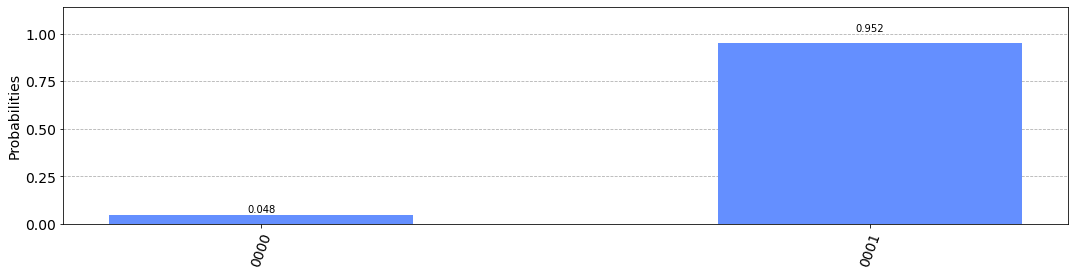

In [74]:
# Listing 6.11: Represent two marginal probabilities with a single qubit
# Specify the marginal probabilities
event_a = 0.4
event_b = 0.8

qc = QuantumCircuit(4)

# Set qubit to prior
qc.ry(prob_to_angle(event_a), 0)

# Apply modifier
qc.ry(prob_to_angle(event_b), 0)

run_circuit(qc)

In [77]:
prob_to_angle(0)

0.0

In [80]:
prob_to_angle(0.4)/np.pi

0.43590578315102513

In [81]:
prob_to_angle(0.8)/np.pi

0.7048327646991335

In [83]:
qc

## 8.1 The No-Cloning Theorem

$$
\begin{align*}
G(|\Psi\rangle|0\rangle) &= |\Psi\rangle|\Psi\rangle\\
G(|\Psi\rangle|0\rangle) &= G(\alpha|0\rangle|0\rangle+\beta|1\rangle|0\rangle)
 = \alpha|0\rangle|0\rangle+\beta|1\rangle|1\rangle\\
|\Psi\rangle|\Psi\rangle &= \alpha^2|0\rangle|0\rangle+\alpha\beta|0\rangle|1\rangle + \beta\alpha|1\rangle|0\rangle+\beta^2|1\rangle|1\rangle\\
\alpha|0\rangle|0\rangle+\beta|1\rangle|1\rangle &\neq \alpha^2|0\rangle|0\rangle+\alpha\beta|0\rangle|1\rangle + \beta\alpha|1\rangle|0\rangle+\beta^2|1\rangle|1\rangle
\end{align*}
$$

# Deutsch algorithm

![\begin{quantikz}
\lstick{$\ket{0}$} & \gate{H} \slice[style=blue]{$\ket{\Psi_1}$}& \gate[2][2cm]{U_f}\gateinput{$x$}
\gateoutput{$x$} \slice[style=blue]{$\ket{\Psi_2}$}
& \gate{H} \slice[style=blue]{$\ket{\Psi_3}$}& \meter{} &\cw \\
\lstick{$\ket{1}$} & \gate{H} & \gateinput{$y$} 
\gateoutput{$y\oplus f(x)$} &\qw& \qw&\qw
\end{quantikz}](https://i.imgur.com/8yvq7Tv.png)

Deutsch algorithm [^1]  

$$
\begin{align*}
U_f|x\rangle|-\rangle&=(-1)^{f(x)}|x\rangle|-\rangle\\
|\Psi_1\rangle &= |+\rangle|-\rangle\\
|\Psi_2\rangle &= {1\over\sqrt2}(U_f|0\rangle|-\rangle+U_f|1\rangle|-\rangle)
= {1\over\sqrt2}\left[(-1)^{f(0)}|0\rangle+(-1)^{f(1)}|1\rangle\right]|-\rangle\\
&=\begin{cases}
\pm |+\rangle|-\rangle& \text{ if } f(0)=f(1) \\ 
\pm |-\rangle|-\rangle & \text{ if } f(0)\neq f(1) 
\end{cases}\\
|\Psi_3\rangle &=\begin{cases}
\pm |0\rangle|-\rangle& \text{ if } f(0)=f(1) \\ 
\pm |1\rangle|-\rangle & \text{ if } f(0)\neq f(1) 
\end{cases} \\
&=\pm|f(0)\oplus f(1)\rangle|-\rangle
\end{align*}
$$

[^1]: Nielsen1.4.3

In [1]:
# Listing 8.2: Deutsch's algorithm
from math import sqrt
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister, Aer, execute
from qiskit.visualization import plot_histogram

def solve(oracle):
    """
    A reusable function that identifies whether the oracle represents
    a constant or a balanced function.
    """

    qu = QuantumRegister(2)
    cl = ClassicalRegister(1)

    # initialize the circuit
    qc = QuantumCircuit(qu,cl)

    # Prepare the input state of the oracle
    qc.x(1)
    
    qc.h(0)
    qc.h(1)

    # Apply the Oracle
    oracle(qc)

    # Prepare the output state
    qc.h(0)

    # measure qubit-0
    qc.measure(qu[0], cl[0])

    # Tell Qiskit how to simulate our circuit
    backend = Aer.get_backend('qasm_simulator')

    # execute the qc
    results = execute(qc,backend, shots = 1000).result().get_counts()

    # plot the results
    return plot_histogram(results)

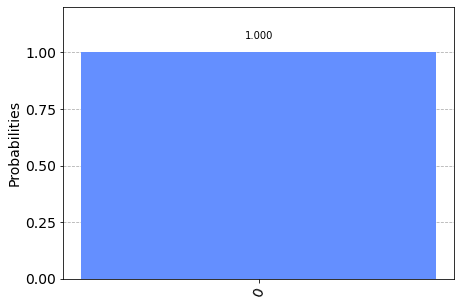

In [7]:
# Listing 8.3: Apply the gate o‐0

#constant function f(x) = 0
def o_0(qc):
    pass

solve(o_0)

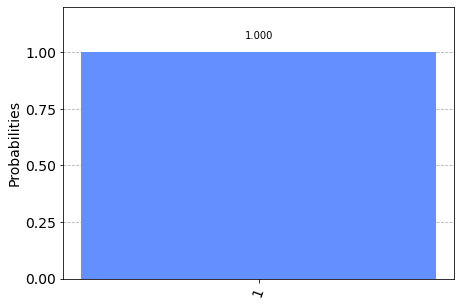

In [9]:
# Listing 8.4: Apply the gate o‐1
# balanced f(x) = x
def o_1(qc):
    qc.cx(0,1)

solve(o_1)

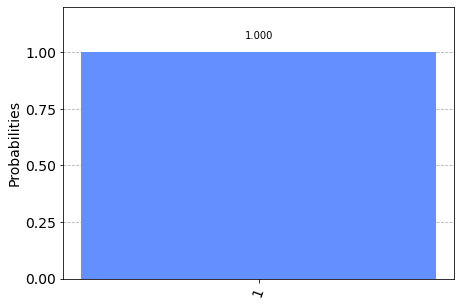

In [10]:
# Listing 8.5: Apply the gate o‐2
# f(x) = NOT(x) balanced
def o_2(qc):
    qc.x(0)
    qc.cx(0,1)
    qc.x(0)

solve(o_2)

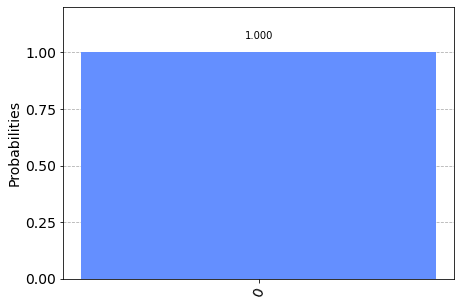

In [11]:
# Listing 8.6: Apply the gate o‐3
# f(x) = 1 constant function
def o_3(qc):
    qc.x(1)

solve(o_3)

substack https://pyqml.substack.com  
medium: https://pyqml.medium.com  

# Variational Quantum Eigensolver

https://towardsdatascience.com/the-variational-quantum-eigensolver-explained-adcbc9659c3a  

[Lecture note](https://www.chalmers.se/en/centres/wacqt/graduate%20school/aqa/Documents/Chapter7+Refs.pdf)  


# Quantum Approximate Optimization Algorithm (QAOA)